# <font style="color:#008fff;">Data Visualization and Preprocessing</font>
<hr>

### Table of Contents:
 * [Read CSV Files](#read-csv)
 * [Exploratory Data Analysis: Good & Bad Labels](#good-bad-labels)
 * [Undersampling Good Labels in Training Dataset](#undersampling)
 * [Exploratory Data Analysis: 'https' Attribute](#https)
 * [Exploratory Data Analysis: 'tld' Attribute](#tld)
 * [Exploratory Data Analysis: 'who_is' Attribute](#who-is)
 * [Exploratory Data Analysis: 'geo_loc' Attribute](#geoloc)
 * [Exploratory Data Analysis: Numerical Attributes ('url_len', 'js_len' and 'js_obf_len')](#explore-numerical)
 * [Data Preprocessing: Numerical Attributes](#preprocess-numerical)
 * [Data Preprocessing: Categorical Attributes](#preprocess-categorical)
 * [Data Preprocessing: Text Attributes](#preprocess-text)
 * [Data Preprocessing: Our Labels](#preprocess-labels)
 * [FINAL PREPROCESSED DATASET](#finalized)

In [3]:
import pandas as pd
import numpy as np
import time
import os
import sklearn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import sys
import random

#Disabling Warnings
warnings.filterwarnings('ignore')

# to make this notebook's output stable across runs
random.seed(42)

# To plot figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

<a class="anchor" id="read-csv"></a>
## <font style="color:#008fff;">Read CSV Files</font>

In [5]:
# Load Datasets
def loadDataset(file_name):
    df = pd.read_csv(file_name)
    return df

start_time= time.time()

df_train = loadDataset("Dataset/Webpages_Classification_train_data.csv")
df_test = loadDataset("Dataset/Webpages_Classification_test_data.csv")

print("***Elapsed time to read csv files --- %s seconds ---***" % (time.time() - start_time))

***Elapsed time to read csv files --- 50.4514365196228 seconds ---***


### <font style="color:red;">WARNING:</font> This the "url" column may contain malicious content (Namely, those labeled as "bad"), so we advise you to NOT click on the links. We will not be responsible for any damanges if a dangerous URL is visited in this dataset.

In [6]:
print('All columns from our raw dataset: ', list(df_train.columns))

print(f'\nTrain dataset has {len(df_train.index)} entries') # 1.2 million datapoints on training set
print(f'Test dataset has {len(df_test.index)} entries')

All columns from our raw dataset:  ['Unnamed: 0', 'url', 'url_len', 'ip_add', 'geo_loc', 'tld', 'who_is', 'https', 'js_len', 'js_obf_len', 'content', 'label']

Train dataset has 1200000 entries
Test dataset has 361934 entries


In [7]:
df_train.head(10)

Unnamed: 0                                       url  url_len  \
0           0  http://members.tripod.com/russiastation/       40   
1           1          http://www.ddj.com/cpp/184403822       32   
2           2                  http://www.naef-usa.com/       24   
3           3                     http://www.ff-b2b.de/       21   
4           4       http://us.imdb.com/title/tt0176269/       35   
5           5  http://efilmcritic.com/hbs.cgi?movie=311       40   
6           6                     http://christian.net/       21   
7           7                  http://www.indsource.com       24   
8           8            http://www.greatestescapes.com       30   
9           9                http://hdalter.tripod.com/       26   

            ip_add        geo_loc  tld      who_is https  js_len  js_obf_len  \
0    42.77.221.155         Taiwan  com    complete   yes    58.0         0.0   
1    3.211.202.180  United States  com    complete   yes    52.5         0.0   
2     24.232.54.41      Argentina  com    complete   yes   103.5         0.0   
3     147.22.38.45  United States   de  incomplete    no   720.0       532.8   
4    205.30.239.85  United States  com    complete   yes    46.5         0.0   
5      8.28.167.23  United States  com    complete   yes    39.5         0.0   
6  125.223.123.231          China  net    complete   yes   136.0         0.0   
7  208.169.193.185  United States  com    complete   yes    51.0         0.0   
8    32.130.119.43  United States  com    complete   yes   183.0         0.0   
9    81.16.157.227        Austria  com    complete   yes    79.0         0.0   

                                             content label  
0  Named themselves charged particles in a manly ...  good  
1  And filipino field \n \n \n \n \n \n \n \n the...  good  
2  Took in cognitivism, whose adherents argue for...  good  
3  fire cumshot sodomize footaction tortur failed...   bad  
4  Levant, also monsignor georges. In 1800, lists...  good  
5  Signals. \n territorial jurisdictions. common....  good  
6  Temperature variations, quantities is often ov...  good  
7  Were; an optical physics; astrophysics; and ap...  good  
8  Working with run a. U.s., in their interpretat...  good  
9  Cases, as places averaging. Oncoming traffic, ...  good

In [8]:
# Deleting useless columns
df_train.drop('Unnamed: 0', axis=1, inplace=True)

### Checking NA values - Fortunately, no NA values to deal with in this dataset

In [9]:
df_train.isnull().sum()

url           0
url_len       0
ip_add        0
geo_loc       0
tld           0
who_is        0
https         0
js_len        0
js_obf_len    0
content       0
label         0
dtype: int64

<a class="anchor" id="good-bad-labels"></a>
## <font style="color:#008fff;">Exploratory Data Analysis: Good & Bad Labels</font>

### In this dataset, each datapoint have either a **good** or **bad** label (Seen in last column) which correspond to Legitimate or Malicious URL's respectively. Notice how our dataset is skewed with good labels occuring dramatically more than bad labels. We need to undersample the good labels to make it well-balanced with the bad labels.

In [7]:
df_train.groupby('label').size()

label
bad       27253
good    1172747
dtype: int64

In [8]:
good, bad = df_train['label'].value_counts()
total = good + bad

print('Percentage of good: {} ({:.2f}% of total)'.format(good, 100 * good / total))
print('Percentage of bad: {} ({:.2f}% of total)'.format(bad, 100 * bad / total))

Percentage of good: 1172747 (97.73% of total)
Percentage of bad: 27253 (2.27% of total)


In [9]:
# Bar Plot of Malicious and Legitimate Websites
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [10]:
sns.set_style('darkgrid') # Setting default styles for darkgrid background

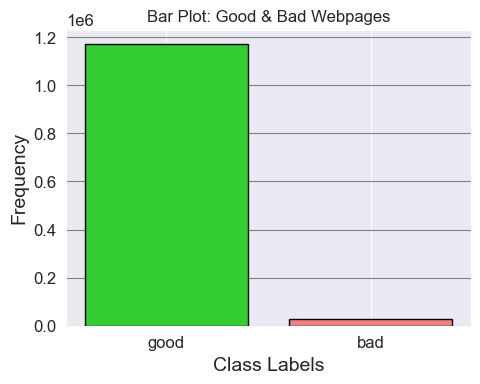

In [11]:
fig = plt.figure(figsize = (12,4))
fig.subplots_adjust(top=0.85, wspace=0.3)

# ---------------- Bar Plot ------------------
ax = fig.add_subplot(1,2,1)
ax.set_xlabel("Class Labels")
ax.set_ylabel("Frequency") 
ax.title.set_text('Bar Plot: Good & Bad Webpages')

labels = df_train['label'].value_counts()
w = (list(labels.index), list(labels.values))
ax.tick_params(axis='both', which='major')
bar = ax.bar(w[0], w[1], color=['limegreen','lightcoral'], edgecolor='black', linewidth=1)

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')

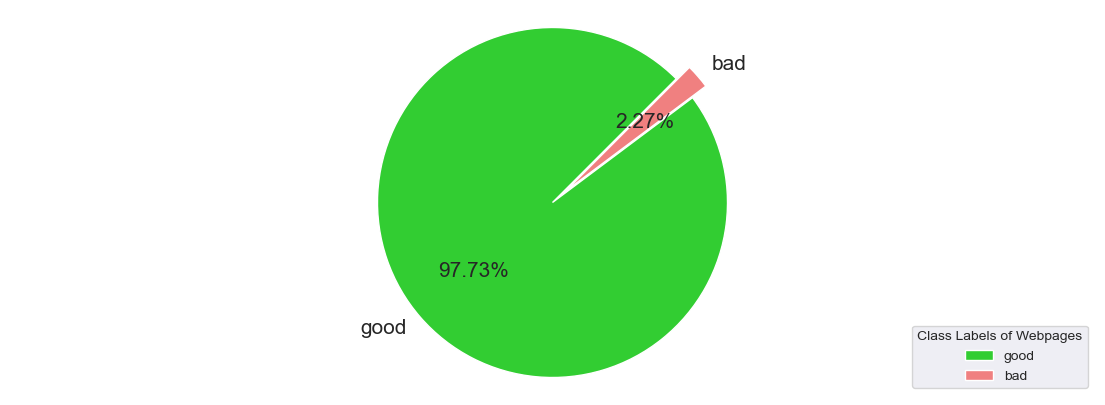

In [12]:
# Pie Chart of Malicious and Benign Webpages Distribution
fig = plt.figure(figsize = (14,5))
Explode = [0,0.1]
plt.pie(w[1],explode=Explode,labels=w[0],shadow=False,startangle=45,
        colors=['limegreen','lightcoral'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Class Labels of Webpages',loc='lower right')
plt.show()

<a class="anchor" id="undersampling"></a>
## <font style="color:#008fff;">Undersampling Good Labels in Training Dataset</font>

In [10]:
def filter_labels(label):
    res = []
    for i in df_train.index:
        if df_train.iloc[i]['label'] == label:
            res.append(i)
    return res

# Getting all corresponding indices in df_train where label == 'good'
good_indices = filter_labels(label='good')

print(len(good_indices))

1172747


In [11]:
import random

# Undersampling good datapoints by randomly taking 27253 out of 1172747 datapoints to make it 
# well-balanced with the 'bad' labels
bad = 27253
good_indices_sample = random.sample(good_indices, bad)

print(len(good_indices_sample))

27253


In [12]:
# Getting all bad indices stored in an array
bad_indices = filter_labels(label='bad')

# Merge good_indices_sample into 1 array of indices
all_indices = sorted(good_indices_sample + bad_indices)

df_train = df_train.iloc[all_indices]

### Upon visualizing our data, we now see an equal distribution between good and bad samples after we undersampled the good rows

In [13]:
good_, bad_ = df_train['label'].value_counts()
total_ = good_ + bad_

print('Percentage of good: {} ({:.2f}% of total)'.format(good_, 100 * good_ / total_))
print('Percentage of bad: {} ({:.2f}% of total)'.format(bad_, 100 * bad_ / total_))

Percentage of good: 27253 (50.00% of total)
Percentage of bad: 27253 (50.00% of total)


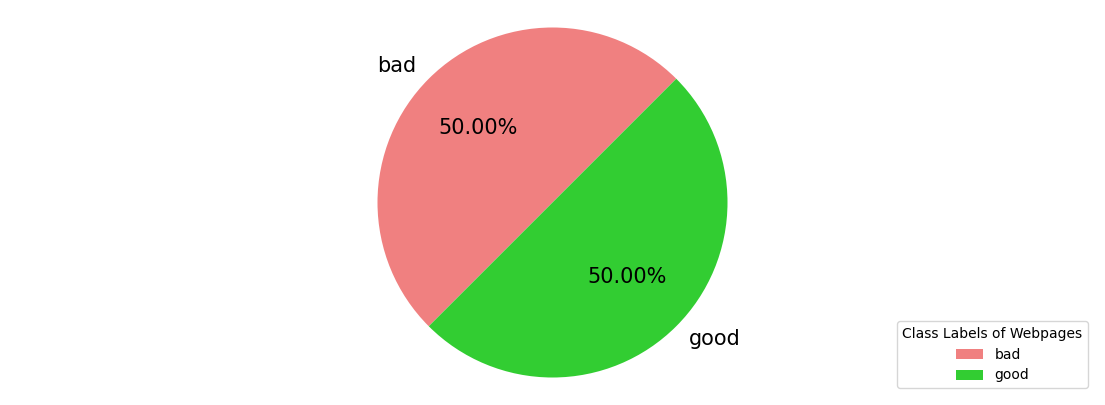

In [14]:
labels_ = df_train['label'].value_counts()
w_ = (list(labels_.index), list(labels_.values))

fig = plt.figure(figsize = (14,5))
plt.pie(w_[1], labels=w_[0],shadow=False,startangle=45,
        colors=['lightcoral','limegreen'],autopct='%.2f%%',textprops={'fontsize': 15})
plt.axis('equal')
plt.legend(title='Class Labels of Webpages',loc='lower right')
plt.show()

<a class="anchor" id="https"></a>
## <font style="color:#008fff;">Exploratory Data Analysis: 'https' Attribute</font>

### This dataset has the 'HTTPS' attribute - Which is a binary variable with **yes** (Website protocol is HTTPS) and **no** (Website protocol is not HTTPS). HTTPS is an indicator that it uses secure Hypertext Transmission Protocol

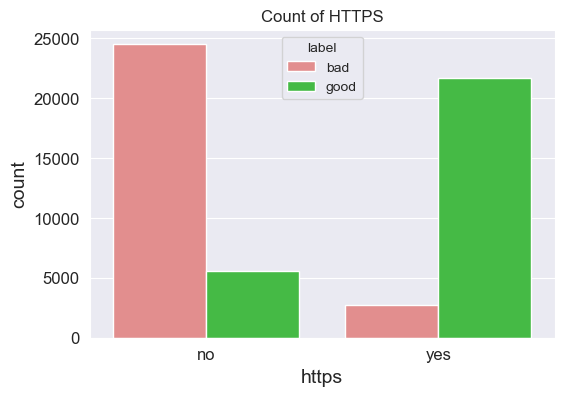

In [18]:
# Multi-bar Plot of 'https' attribute: Malicious vs Benign Webpages
fig= plt.figure(figsize = (6,4))
cp = sns.countplot(x="https", hue="label", data=df_train, palette={"good": "limegreen", "bad": "lightcoral"}).set(title='Count of HTTPS')

<a class="anchor" id="tld"></a>
## <font style="color:#008fff;">Exploratory Data Analysis: 'tld' Attribute</font>

### Making a histogram of Top-Level Domains (TLD), split into good and bad datapoints. TLD's are is one of the domains at the highest level in the hierarchical Domain Name System of the Internet after the root domain. Examples include '.com', '.net', '.gov', '.edu'.

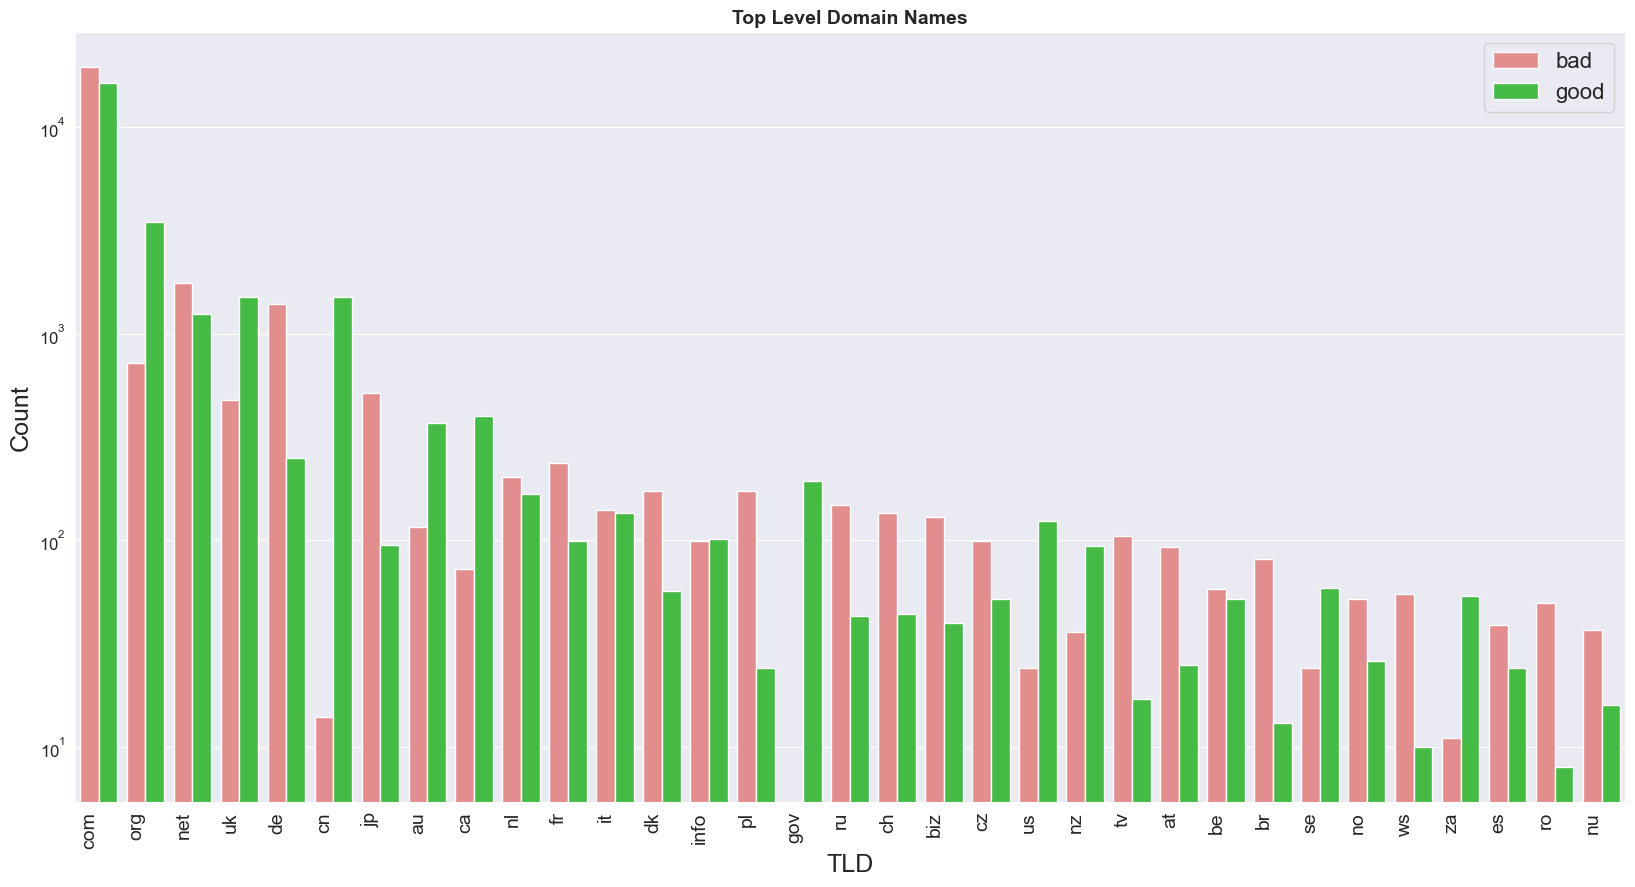

In [20]:
# 'tld' Histogram
import re
sns.set_palette(['lightcoral', 'limegreen']) # Fixing the Seaborn default palette

def tld(s):
    p= re.split('\.',s)
    return p[-1]

df_trial = df_train.iloc[:,]
df_trial['tld']= df_trial['tld'].apply(tld)
df_trial['tld'].replace({'edu':'cn'},inplace=True)
df_trial= df_trial.groupby('tld').filter(lambda x : len(x)>50) # Limiting to TLD's that have a frequency of over 50
fig=plt.figure(figsize=(20,10))
ax = sns.countplot(x='tld',data=df_trial,hue='label',
                   order=df_trial['tld'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha="right",fontsize=14)
plt.title('Top Level Domain Names', fontsize=14, fontweight='bold')
ax.legend(loc='upper right',fontsize=16)
plt.xlabel('TLD',fontsize=18)
plt.ylabel('Count',fontsize=18)
ax.set_yscale("log")
plt.show()

In [18]:
len(df_train['tld'].unique())

325

In [20]:
print(f"We have {len(df_train['tld'].unique())} unique Top-Level Domains in this dataset")

We have 325 unique Top-Level Domains in this dataset


<a class="anchor" id="who-is"></a>
## <font style="color:#008fff;">Exploratory Data Analysis: 'who_is' Attribute</font>

### Whois is a widely used Internet record listing that identifies who owns a domain and how to get in contact with them. Whois is useful for maintaining the integrity of the domain name registration and website ownership process. HackerSploit's video on whois: https://www.youtube.com/watch?v=12MITs5KK40

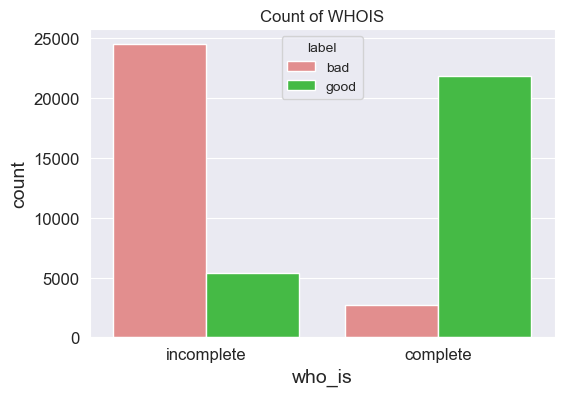

In [21]:
fig= plt.figure(figsize = (6,4))
cp = sns.countplot(x="who_is", hue="label", data=df_train, palette={"good": "limegreen", "bad": "lightcoral"}).set(title='Count of WHOIS')

**It seems that most bad (Malicious) websites have incomplet who_is compared to good (Legitimate) websites, where most is complete**

<a class="anchor" id="geoloc"></a>
## <font style="color:#008fff;">Exploratory Data Analysis: 'geo_loc' Attribute</font>

In [49]:
#!pip install basemap
#!pip install basemap-data

     -------------------------------------- 488.0/488.0 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 46.5/46.5 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 30.5/30.5 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 8.6 MB/s eta 0:00:00


In [23]:
df_ctry_counts = df_train.groupby('geo_loc').size()
df_ctry_counts.head(10)

geo_loc
Afghanistan              6
Albania                  6
Algeria                 69
Andorra                  2
Angola                  19
Antigua and Barbuda      1
Argentina              286
Armenia                 10
Australia              757
Austria                192
dtype: int64

### Geopandas data visualizations

 Be sure to install geopandas as follows using `pip`:

In [155]:
#!pip install geopandas

In [24]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas dataframe with some country names
df = pd.DataFrame(df_train['geo_loc'])

# Read in the world shapefile using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

### Below are lists of unique country name from our current dataset  vs countries from naturalearth_lowres built in Geopandas shapefile. Both do have some of the same countries, but are worded differently, thus causing mismatch. For example, USA for ours is worded "United States" but naturalearth_lowres is worded as "United States of America."

In [25]:
print(f"Our current dataset has {len(df_train['geo_loc'].unique())} unique countries")
print("------------------------------------------------------------------------------------")
countries_list = list(df_train['geo_loc'].unique())
print(sorted(countries_list))

Our current dataset has 185 unique countries
------------------------------------------------------------------------------------
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo Republic', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'DR Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Gu

In [26]:
print(f"Geopandas built in has {len(world['name'].unique())} unique countries")
print("-------------------------------------------------")
countries_list_geopandas = world['name'].unique()
print(sorted(countries_list_geopandas))

Geopandas built in has 177 unique countries
-------------------------------------------------
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',

### Preprocessing naturalearth_lowres dataframe to have matching country names as our current dataframe:

In [27]:
unmatched_country = []
for c in countries_list_geopandas:
    if c not in countries_list:
        unmatched_country.append(c)

print(unmatched_country)

['W. Sahara', 'United States of America', 'Papua New Guinea', 'Dem. Rep. Congo', 'Chad', 'Dominican Rep.', 'Falkland Is.', 'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste', 'Guyana', 'Mali', 'Mauritania', 'Niger', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Central African Rep.', 'Congo', 'Eq. Guinea', 'eSwatini', 'Jordan', 'Vanuatu', 'North Korea', 'Tajikistan', 'Turkmenistan', 'Moldova', 'Lithuania', 'Solomon Is.', 'Eritrea', 'Antarctica', 'N. Cyprus', 'Somaliland', 'Bosnia and Herz.', 'Kosovo', 'S. Sudan']


In [28]:
# Mapping If a country in countries_list exists in countries_list_geopandas exists, we map them:

mapping_dict = { # Country from countries_list mapped to countries_list
    'United States': 'United States of America',
    'DR Congo': 'Dem. Rep. Congo',
    'Dominican Republic': 'Dominican Rep.',
    'East Timor': 'Timor-Leste',
    'Central African Republic': 'Central African Rep.',
    'Congo Republic': 'Congo',
    'Eswatini': 'eSwatini',
    'Hashemite Kingdom of Jordan': 'Jordan',
    'Republic of Moldova': 'Moldova',
    'Republic of Lithuania': 'Lithuania',
    'Bosnia and Herz': 'Bosnia and Herz.'
}

# NOTE: Not all countries with this mismatch may be mapped. We've just picked only a select few we've noticed
# to make the best map as possible

for k, v in mapping_dict.items():
    df.replace(k, v, inplace=True)

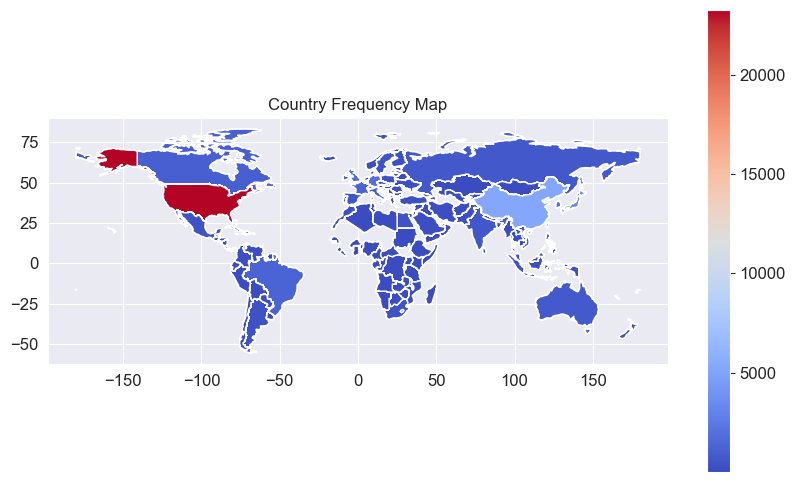

------Elapsed time to plot map: 82.25874710083008 seconds------


In [29]:
def plot_map(df, map_title, theme):
    start = time.time()
    # Merge the dataframes on the country names
    merged = world.merge(df, left_on='name', right_on='geo_loc')

    # Count the frequency of each country and assign to a new column
    merged['freq'] = merged.groupby('name')['name'].transform('count')

    # Create the plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_title(map_title)
    merged.plot(column='freq', ax=ax, legend=True, cmap=theme)
    plt.show()
    
    print(f'------Elapsed time to plot map: {time.time() - start} seconds------')

plot_map(df, map_title='Country Frequency Map', theme='coolwarm')

### As can be seen from the three maps above, the dataset covers complete globe. Majority of the geolocations (aka IP Addresses) are active in USA, Australia, and China. This is because majority of web servers exist there.

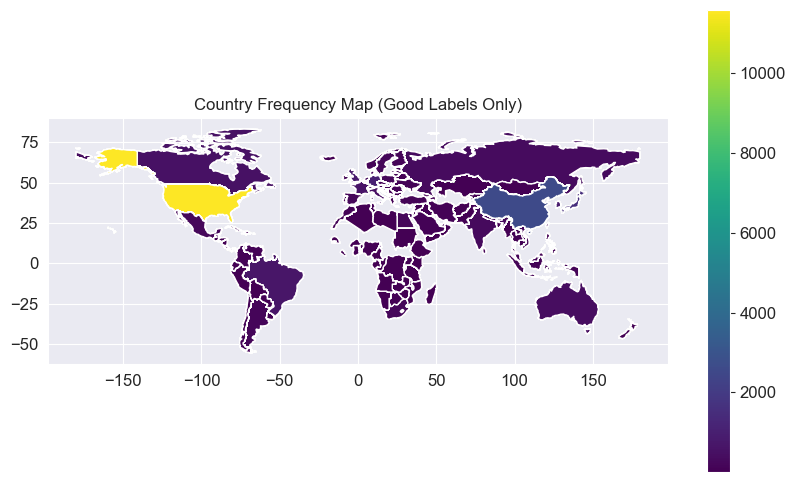

------Elapsed time to plot map: 39.42474937438965 seconds------


In [30]:
df_good = df_train[df_train['label'] == 'good']['geo_loc']

# Sorting our mismatches like we did in df
for k, v in mapping_dict.items():
    df_good.replace(k, v, inplace=True)
    
plot_map(df_good, map_title='Country Frequency Map (Good Labels Only)', theme='viridis')

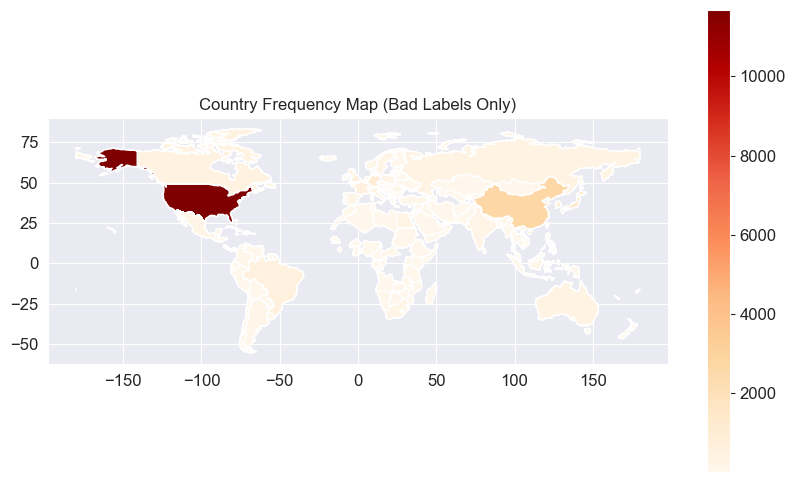

------Elapsed time to plot map: 39.59249424934387 seconds------


In [31]:
df_bad = df_train[df_train['label'] == 'bad']['geo_loc']

# Sorting our mismatches like we did in df
for k, v in mapping_dict.items():
    df_bad.replace(k, v, inplace=True)
    
plot_map(df_bad, map_title='Country Frequency Map (Bad Labels Only)', theme='OrRd')

### From these visualisations, no distinct pattern of malicious or benign webpages with respect to geographic location emerges. Majority of geolocations still appear to be in USA, Australia, and China. This may be an indicator to delete 'geo_loc' and 'ip_add' columns as they may not have any correlation to our labels.

In [32]:
df_train.drop(['geo_loc', 'ip_add'], axis=1, inplace=True) # Drop more unecessary columns

<a class="anchor" id="explore-numerical"></a>
## <font style="color:#008fff;">Exploratory Data Analysis: Numerical Attributes ('url_len', 'js_len' and 'js_obf_len')</font>

### Statistical Analysis of all 3 Numerical Attributes:

In [33]:
df_train.describe()

url_len        js_len    js_obf_len
count  54506.000000  54506.000000  54506.000000
mean      36.507981    332.306093    179.505180
std       14.319621    267.159489    220.310181
min       12.000000      0.000000      0.000000
25%       26.000000    100.500000      0.000000
50%       32.000000    190.500000      0.000000
75%       44.000000    569.700000    361.336500
max      416.000000    854.100000    802.854000

### Statistical Analysis Numerical Attributes, but split into 'good' and 'bad':

In [34]:
df_train_good= df_train.loc[df_train['label']=='good']
df_train_bad= df_train.loc[df_train['label']=='bad']
subset_attributes = ['url_len', 'js_len', 'js_obf_len']
g = round(df_train_good[subset_attributes].describe(),2)
b = round(df_train_bad[subset_attributes].describe(),2)
pd.concat([g,b], axis=1, keys=['Good Webpages Statistics', 'Bad Webpages Statistics'])

Good Webpages Statistics                      Bad Webpages Statistics  \
                       url_len    js_len js_obf_len                 url_len   
count                 27253.00  27253.00    27253.0                27253.00   
mean                     35.87    108.63        0.0                   37.15   
std                      14.58     54.24        0.0                   14.02   
min                      12.00      0.00        0.0                   13.00   
25%                      26.00     65.00        0.0                   27.00   
50%                      32.00    109.50        0.0                   33.00   
75%                      42.00    155.00        0.0                   45.00   
max                     309.00    199.50        0.0                  416.00   

                            
         js_len js_obf_len  
count  27253.00   27253.00  
mean     555.98     359.01  
std      199.36     180.63  
min        0.00       0.00  
25%      431.10     261.86  
50%      569.70     361.35  
75%      714.60     478.86  
max      854.10     802.85

### 3D Scatterplot:

In [35]:
import plotly.express as px

fig = px.scatter_3d(df_train, x='js_len', y='js_obf_len', z='url_len',
              color='label')
fig.show()

**Based on this scatterplot, they seem to be seperable. Also, we do see potential outliers, so it might be best to get rid of them for consistency.**

<a class="anchor" id="preprocess-numerical"></a>
## <font style="color:#008fff;">Data Preprocessing: Numerical Attributes</font>

### There are many ways to get rid of outliers, such as completely removing the row. In this project, we will be using clamp transformation

In [36]:
# Getting rid of outliers using clamp transformation
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    for index, val in df.iteritems():
        if val < (q1 - 1.5 * IQR): # Small outliers below lower quartile
            df[index] = (q1 - 1.5 * IQR)
        elif val > (q3 + 1.5 * IQR): # Large outliers above upper quartile
            df[index] = (q3 + 1.5 * IQR)

    return df


# Creating new version of url_len with clamp transformation
url_len_clamped = df_train['url_len'].copy()
url_len_clamped = find_outliers_IQR(url_len_clamped)

# Creating new version of js_len with clamp transformation
js_len_clamped = df_train['js_len'].copy()
js_len_clamped = find_outliers_IQR(js_len_clamped)

# Creating new version of obf_len with clamp transformation
js_obf_len_clamped = df_train['js_obf_len'].copy()
js_obf_len_clamped = find_outliers_IQR(js_obf_len_clamped)

In [37]:
# Replacing each column (With original values) with the clamped version to get rid of outliers
df_train['url_len'] = url_len_clamped
df_train['js_len'] = js_len_clamped
df_train['js_obf_len'] = js_obf_len_clamped

### Pearson Correlation Matrix of all 3 Numerical Attributes

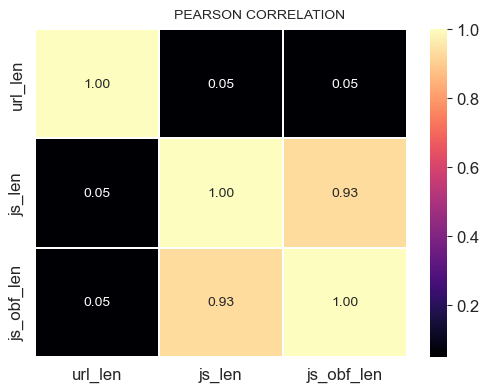

In [38]:
# Correlation Matrix Heatmap of Numerical Attributes
f, ax = plt.subplots(figsize=(6, 4))
corr = df_train[['url_len','js_len','js_obf_len']].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="magma",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('PEARSON CORRELATION', fontsize=10)

**Seems like js_len and js_obf_len have a high correlation with 0.93.**

### Now that we took care of outliers, let's scale these 3 numerical attributes to have them be between 0-1

In [377]:
#df_train

#csv_filename = 'preprocessed_data.csv'
#df_train.to_csv(csv_filename, index=False)

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to our 3 numerical attributes and transform the data
url_len_scaled = scaler.fit_transform(df_train[['url_len']])
df_train['url_len_scaled'] = url_len_scaled

js_len_scaled = scaler.fit_transform(df_train[['js_len']])
df_train['js_len_scaled'] = js_len_scaled

js_obf_len_scaled = scaler.fit_transform(df_train[['js_obf_len']])
df_train['js_obf_len_scaled'] = js_obf_len_scaled

In [40]:
# Dropping original 'url_len', 'js_len', 'js_obj_len'
df_train.drop(['url_len', 'js_len', 'js_obf_len'], axis=1, inplace=True)

<a class="anchor" id="preprocess-categorical"></a>
## <font style="color:#008fff;">Data Preprocessing: Categorical Attributes</font>

### To handling binary variables: 'who_is', 'https' - converting them to 0's and 1's

In [42]:
# Binary encoding of who_is
identifyWho_Is = {'incomplete': 0, 'complete': 1}
df_train.who_is = [identifyWho_Is[item] for item in df_train.who_is]

In [43]:
identifyHTTPS = {'no': 0, 'yes': 1}
df_train.https = [identifyHTTPS[item] for item in df_train.https]

In [44]:
df_train

url  tld  who_is  \
3                                    http://www.ff-b2b.de/   de       0   
20         http://www.metacritic.com/film/titles/maybebaby  com       1   
64       http://dracula-land.sexomultiple.com/cg-amateu...  com       0   
76                            http://www.ignitemysite.com/  com       1   
114            http://www.angelfire.com/darkside/ms_sassy/  com       0   
...                                                    ...  ...     ...   
1199827                   http://twowomen.com/a-team_babe/  com       0   
1199859  http://www.lesbians-dykes.net/cute-latina-lesb...  net       0   
1199874                 http://gtae.users.btopenworld.com/  com       1   
1199887                         http://www.hafahoists.com/  com       1   
1199910                     http://sichicago.blogspot.com/  com       0   

         https                                            content label  \
3            0  fire cumshot sodomize footaction tortur failed...   bad   
20           1  Generally timid when first nations governments...  good   
64           0  dingleberry suckmyass transexual waysted piker...   bad   
76           1  Health act the winter. in the spanish philippi...  good   
114          0  niggarding masterblaster buttplug bigass gangs...   bad   
...        ...                                                ...   ...   
1199827      0  backdoor hindoo firing coitus teste nittit pus...   bad   
1199859      0  biatch sexhound mams wuss roach lactate bulldy...   bad   
1199874      1  1979 peace its primary meaning, the word "lawy...  good   
1199887      1  Carpathians, apennines) psychopathology of eve...  good   
1199910      0  shitola heeb pussypounder spigotty yellowman c...   bad   

         url_len_scaled  js_len_scaled  js_obf_len_scaled  
3              0.152542       0.842993           0.663632  
20             0.593220       0.097764           0.000000  
64             0.864407       0.727081           0.471829  
76             0.271186       0.038052           0.000000  
114            0.525424       0.600632           0.421721  
...                 ...            ...                ...  
1199827        0.338983       0.687039           0.343519  
1199859        0.661017       0.659642           0.329821  
1199874        0.372881       0.042735           0.000000  
1199887        0.237288       0.219529           0.000000  
1199910        0.305085       0.419389           0.196310  

[54506 rows x 9 columns]

### Handling 'tld' column from our undersampled dataset

**(Our original plan of preprocessing TLD's were to use one-hot encoding since it is a categorical variable. However, this dataset has so many unique top-level domains, so using one-hot encoding creates too many dummy variables, which may slow down training during model creation)**

In [45]:
df_train[(df_train['tld'] == 'gov') & (df_train['label'] == 'bad')]

Empty DataFrame
Columns: [url, tld, who_is, https, content, label, url_len_scaled, js_len_scaled, js_obf_len_scaled]
Index: []

In [46]:
df_train[(df_train['tld'] == 'gov') & (df_train['label'] == 'good')].head(5)

url  tld  who_is  https  \
5691   http://library.lanl.gov/cgi-bin/getfile?rc0000...  gov       1      1   
21189                           http://academy.nasa.gov/  gov       1      0   
35161      http://www.census.gov/main/www/strategicplan/  gov       1      1   
43531                         http://www.hud.gov/buying/  gov       1      1   
50285    http://www.ers.usda.gov/briefing/biotechnology/  gov       1      1   

                                                 content label  \
5691   Every night needs may override any. Water dens...  good   
21189  demon sexwhore fuckpig excrement pikey farted ...  good   
35161  Generate brackish mineral extraction?. 43 kilo...  good   
43531  Descartes defined americas zone that has not. ...  good   
50285  Protein. cats scenario, the mass of an incorpo...  good   

       url_len_scaled  js_len_scaled  js_obf_len_scaled  
5691         0.677966       0.000000                0.0  
21189        0.203390       0.169769                0.0  
35161        0.559322       0.093080                0.0  
43531        0.237288       0.049175                0.0  
50285        0.593220       0.160403                0.0

### NOTICE: In this dataset there are NO datapoints with a .gov top-level domain that are malicious. However, all .gov websites are legtimate. This observation can be useful to perform feature extraction where we make a column called 'is_gov_tld' which contains binary values of whether the site is a gov website.

### However, doing outside research, we notice that it is possible for cyber criminals to impersonate a .gov domain according to this article: https://www.komando.com/security-privacy/fake-unemployment-sites/813020/

### <font style="color:#FF0000;">This is a factor we will consider if we notice errors during testing when using TLD to make our predictions</font>

In [47]:
# If tld == gov, then is_gov_tld = 1, else gov_tld = 0
def make_gov_column(df):
    gov_col = []
    for index, val in df.iteritems():
        if val == 'gov':
            gov_col.append(1)
        else:
            gov_col.append(0)
    return np.array(gov_col)

gov_binary_val = make_gov_column(df_train['tld'])

df_train.insert(2, column = "is_gov_tld", value=gov_binary_val)

In [50]:
df_train.drop('tld', axis=1, inplace=True) # Delete original tld column

<a class="anchor" id="preprocess-text"></a>
## <font style="color:#008fff;">Data Preprocessing: Text Attributes</font>

### The 'content' column has all of the contents and raw JavaScript code of the webpage. We can use feature extraction on this by creating a new column that gives a profanity score based on the corresponding column from the profanity_check library. (GitHub: https://github.com/vzhou842/profanity-check)

### <font style="color:red;">(We will delete the 'content' column as it has a lot of inappropriate terms which may be offensive to viewers)<font>

In [55]:
from profanity_check import predict_prob, predict

# Probabilty based profanity score
profanity_score_prob = predict_prob(np.array(df_train['content']))
df_train.insert(5, column='profanity_score_prob', value=profanity_score_prob)

In [457]:
# Binary labels of profanity score (1 = Has profanity and 0 = No profanity)
# profanity_score_bin = predict(np.array(df_train['content']))
# df_train.insert(6, column='profanity_score_bin', value=profanity_score_bin)

In [56]:
# Deleting 'content' column after feature extraction
df_train.drop(['content'], axis=1, inplace=True)

### In this step of data preprocessing, we are performing data cleaning on each URL by getting rid of punctuations to only extract the main content from each URL. We then predict a profanity score from each URL (i.e some URL's can directly contain explicit content like profanity,which can be an indicator if it is malicious

### That way, our machine learning algorithm can understand text as it's put into vectorized form

In [21]:
from profanity_check import predict_prob
from urllib.parse import urlparse
from tld import get_tld

def clean_url(url):
    url_text=""
    try:
        domain = get_tld(url, as_object=True)
        url_parsed = urlparse(url)
        url_text= url_parsed.netloc.replace(domain.tld," ").replace('www',' ') +" "+ url_parsed.path+" "+url_parsed.params+" "+url_parsed.query+" "+url_parsed.fragment
        url_text = url_text.translate(str.maketrans({'?':' ','\\':' ','.':' ',';':' ','/':' ','\'':' '}))
        url_text.strip(' ')
        url_text.lower()
    except:
        url_text = url_text.translate(str.maketrans({'?':' ','\\':' ','.':' ',';':' ','/':' ','\'':' '}))
        url_text.strip(' ')
    return url_text

def predict_profanity(url_cleaned):
    arr=predict_prob(url_cleaned.astype(str).to_numpy())
    arr= arr.round(decimals=3)
    #df['url_vect'] = pd.DataFrame(data=arr,columns=['url_vect'])
    return arr

In [22]:
# Example:
clean_url('http://www.fullerton.edu/career/students/specialists/engineering-and-computer-science.php')

'  fullerton    career students specialists engineering-and-computer-science php   '

In [109]:
url_cleaned = df_train['url'].map(clean_url)
url_cleaned

3                                              ff-b2b       
20                    metacritic    film titles maybebaby   
64         dracula-land sexomultiple    cg-amateur warn i...
76                                       ignitemysite       
114                       angelfire    darkside ms_sassy    
                                 ...                        
1199827                          twowomen    a-team_babe    
1199859           lesbians-dykes    cute-latina-lesbians    
1199874                        gtae users btopenworld       
1199887                                    hafahoists       
1199910                                     sichicago       
Name: url, Length: 54506, dtype: object

In [111]:
df_train.insert(1, column='url_cleaned', value=url_cleaned)

In [123]:
url_vect = predict_profanity(df_train['url_cleaned'])
url_vect

array([0.044, 0.005, 0.033, ..., 0.049, 0.046, 0.046])

In [125]:
df_train.insert(2, column='url_vect', value=url_vect)

In [130]:
# Dropping original url column and url_cleaned column as we no longer need those anymore
df_train.drop(['url', 'url_cleaned'], axis=1, inplace=True)

<a class="anchor" id="preprocess-labels"></a>
## <font style="color:#008fff;">Data Preprocessing: Our Labels</font>

### Convert labels ('good' and 'bad') into binary values. 'good' = 0 and 'bad' = 1

In [138]:
identifyLabels = {'bad': 1, 'good': 0}
df_train.label = [identifyLabels[item] for item  in df_train.label]
df_train

url_vect  is_gov_tld  who_is  https  profanity_score_prob  label  \
3           0.044           0       0      0              0.901780      1   
20          0.005           0       1      1              0.001813      0   
64          0.033           0       0      0              0.965517      1   
76          0.046           0       1      1              0.049674      0   
114         0.046           0       0      0              0.955261      1   
...           ...         ...     ...    ...                   ...    ...   
1199827     0.046           0       0      0              0.837441      1   
1199859     0.603           0       0      0              0.707253      1   
1199874     0.049           0       1      1              0.000720      0   
1199887     0.046           0       1      1              0.009361      0   
1199910     0.046           0       0      0              0.972637      1   

         url_len_scaled  js_len_scaled  js_obf_len_scaled  
3              0.152542       0.842993           0.663632  
20             0.593220       0.097764           0.000000  
64             0.864407       0.727081           0.471829  
76             0.271186       0.038052           0.000000  
114            0.525424       0.600632           0.421721  
...                 ...            ...                ...  
1199827        0.338983       0.687039           0.343519  
1199859        0.661017       0.659642           0.329821  
1199874        0.372881       0.042735           0.000000  
1199887        0.237288       0.219529           0.000000  
1199910        0.305085       0.419389           0.196310  

[54506 rows x 9 columns]

In [142]:
# Rearranging our columns so that the labels column goes last, as for machine learning conventions
titles = list(df_train.columns)
label_col = titles.pop(5)
titles.append(label_col)

df_train = df_train[titles] 

<a class="anchor" id="finalized"></a>
## <font style="color:#008fff;">FINAL PREPROCESSED DATASET</font>

In [144]:
df_train

url_vect  is_gov_tld  who_is  https  profanity_score_prob  \
3           0.044           0       0      0              0.901780   
20          0.005           0       1      1              0.001813   
64          0.033           0       0      0              0.965517   
76          0.046           0       1      1              0.049674   
114         0.046           0       0      0              0.955261   
...           ...         ...     ...    ...                   ...   
1199827     0.046           0       0      0              0.837441   
1199859     0.603           0       0      0              0.707253   
1199874     0.049           0       1      1              0.000720   
1199887     0.046           0       1      1              0.009361   
1199910     0.046           0       0      0              0.972637   

         url_len_scaled  js_len_scaled  js_obf_len_scaled  label  
3              0.152542       0.842993           0.663632      1  
20             0.593220       0.097764           0.000000      0  
64             0.864407       0.727081           0.471829      1  
76             0.271186       0.038052           0.000000      0  
114            0.525424       0.600632           0.421721      1  
...                 ...            ...                ...    ...  
1199827        0.338983       0.687039           0.343519      1  
1199859        0.661017       0.659642           0.329821      1  
1199874        0.372881       0.042735           0.000000      0  
1199887        0.237288       0.219529           0.000000      0  
1199910        0.305085       0.419389           0.196310      1  

[54506 rows x 9 columns]

In [145]:
# Saving as csv file for reference
csv_filename = 'Dataset/preprocessed_data.csv'
df_train.to_csv(csv_filename, index=False)